# Optimization

In this Notebook we are going to load the Disease model, execute and find the parameters that maximize economic output.

- To load and run the Vensim model we use PySD library, please check the following tutorial before continuing: https://pysd.readthedocs.io/en/master/basic_usage.html#
- Model run's output are Pandas Data Frames, please refer to the Pandas documentation if you need additional insights and supported data operations: https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html#user-guide. 
There is also a 10min tutorial available that might be of your interest: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html
- We implemented the plots using matplotlib, if you need additional information please refer to the examples in canvas at "Pre-requisites->Computer Installations->Python and useful packages to explore". You may also refer to the following documentation: https://matplotlib.org/stable/contents.html

In [1]:
import pysd
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy as sp
import scipy.optimize

In [2]:
# load the Vensim model into Python
model = pysd.read_vensim(r'C:\Users\dimcp\Documents\MSD-Group-1\SFD_Group.mdl')

In [3]:
# run the model with default parameter values
model_output = model.run()
model_output.head(5)

,FINAL TIME,INITIAL TIME,SAVEPER,TIME STEP,Scaled divorce,Marriage rate,Delay for societal,Divorce,Societal factor,Population,...,Economic factor,Unmarried,K,Marriage,Married,Recovery rate,Divorce rate,Education,W eco,W soc
1992.00,2018,1992,0.25,0.25,340.500009,0.123413,3,6.308103e+07,0.588623,185260000.0,...,0.53333,4.179500e+07,2.2,5.158054e+06,1.132950e+08,0.004,0.556786,0.9,0.649,0.338
1992.25,2018,1992,0.25,0.25,296.979169,0.123413,3,5.501836e+07,0.588623,185260000.0,...,0.53333,4.053566e+07,2.2,5.002634e+06,9.881426e+07,0.004,0.556786,0.9,0.649,0.338
1992.50,2018,1992,0.25,0.25,259.399497,0.123413,3,4.805635e+07,0.588623,185260000.0,...,0.53333,3.931517e+07,2.2,4.852010e+06,8.631032e+07,0.004,0.556786,0.9,0.649,0.338
1992.75,2018,1992,0.25,0.25,226.937609,0.123413,3,4.204246e+07,0.588623,185260000.0,...,0.53333,3.813365e+07,2.2,4.706194e+06,7.550924e+07,0.004,0.556786,0.9,0.649,0.338
1993.00,2018,1992,0.25,0.25,198.968492,0.123205,3,3.686090e+07,0.589316,185260000.0,...,0.53333,3.699093e+07,2.2,4.557469e+06,6.617517e+07,0.004,0.557020,0.9,0.649,0.338


In [4]:
# list all stocks, variables and parameters of the model
list(model_output)

['FINAL TIME',
 'INITIAL TIME',
 'SAVEPER',
 'TIME STEP',
 'Scaled divorce',
 'Marriage rate',
 'Delay for societal',
 'Divorce',
 'Societal factor',
 'Population',
 'Delay for recovery',
 'Recovery',
 'Divorced',
 'Economic factor',
 'Unmarried',
 'K',
 'Marriage',
 'Married',
 'Recovery rate',
 'Divorce rate',
 'Education',
 'W eco',
 'W soc']

<Axes: xlabel='Year'>

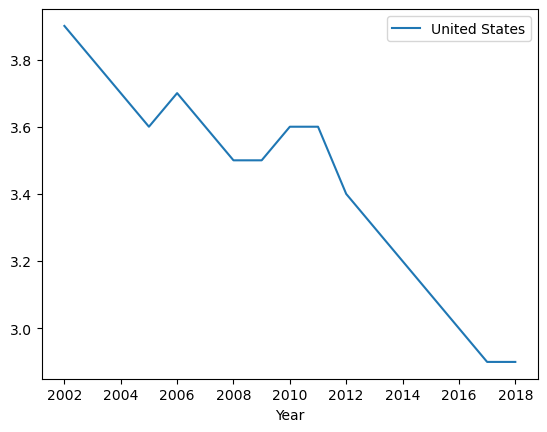

In [22]:
data = pd.read_csv(r'C:\Users\dimcp\Documents\MSD-Group-1\US_2002.csv', sep=',', index_col='Year')
data.plot()

In [30]:
import scipy.optimize as opt
import warnings
warnings.filterwarnings("ignore")
# Your error function remains the same
def error(param_list):
    #unpack the parameter list
    parameter1, parameter2, parameter3, parameter4, parameter5 = param_list
    #run the model with the new parameters, returning the info we're interested in
    result = model.run(params={'K':parameter1,
                               'W soc':parameter2,
                               'W eco': parameter3,
                               'Recovery Rate': parameter4,
                               'Delay for societal': parameter5},
                       return_columns=['Divorce', 'Population'],
                       return_timestamps=list(data.index.values))#return_timestamps=np.arange(2002, 2018, 1))
    #return the sum of the squared errors
    return sum((result['Divorce']/result['Population'] *1000- data['United States'])**2)

# Define the constraint function
def constraint(param_list):
    return 1 - (param_list[1] + param_list[2])

# Define the constraints dictionary
constraints = [{'type': 'ineq', 'fun': constraint}]

# Initial guesses and bounds remain the same
parameter1_guess = 1
parameter2_guess = 0.33
parameter3_guess = 0.33
parameter4_guess = 0.4
parameter5_guess = 3

parameter1_bounds = (-4, 4)
parameter2_bounds = (0, 1)
parameter3_bounds = (0, 1)
parameter4_bounds = (0, 1)
parameter5_bounds = (0, 10)

# Perform the optimization using SLSQP method
res = opt.minimize(error, [parameter1_guess,
                           parameter2_guess,
                           parameter3_guess,
                           parameter4_guess,
                           parameter5_guess],
                   method='SLSQP',
                   bounds=[parameter1_bounds,
                           parameter2_bounds,
                           parameter3_bounds,
                           parameter4_bounds,
                           parameter5_bounds],
                   constraints=constraints)

# Print the result
print(res)


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.21282317328041087
       x: [ 2.993e+00  3.634e-01  1.134e-17  2.041e-03  4.660e-01]
     nit: 37
     jac: [ 3.732e-03  3.406e-03  3.203e-02 -8.908e-01 -1.537e-04]
    nfev: 242
    njev: 37


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 7.322963089048839
       x: [ 2.226e+00  3.381e-01  6.493e-01  4.225e-03  3.000e+00]
     nit: 12
     jac: [ 9.513e-04  2.027e-06  3.785e-05 -2.719e+00 -1.192e-07]
    nfev: 79
    njev: 12
    

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.21282317328041087
       x: [ 2.993e+00  3.634e-01  1.134e-17  2.041e-03  4.660e-01]
     nit: 37
     jac: [ 3.732e-03  3.406e-03  3.203e-02 -8.908e-01 -1.537e-04]
    nfev: 242
    njev: 37
              Divorce   Population  Scaled divorce
2002.0  734307.991070  185260000.0        3.963662
2003.0  715696.978757  185260000.0        3.863203
2004.0  700294.225330  185260000.0        3.780062
2005.0  686517.935178  185260000.0        3.705700
2006.0  673745.903411  185260000.0        3.636759
2007.0  661714.352762  185260000.0        3.571814
2008.0  650296.589903  185260000.0        3.510183
2009.0  639420.699890  185260000.0        3.451477
2010.0  629038.385290  185260000.0        3.395436
2011.0  619112.777911  185260000.0        3.341859
2012.0  609613.396722  185260000.0        3.290583
2013.0  600513.872249  185260000.0        3.241465
2014.0  591790.793421  185260000.0        3.194380
2015.0  

Text(2, 9000, '')

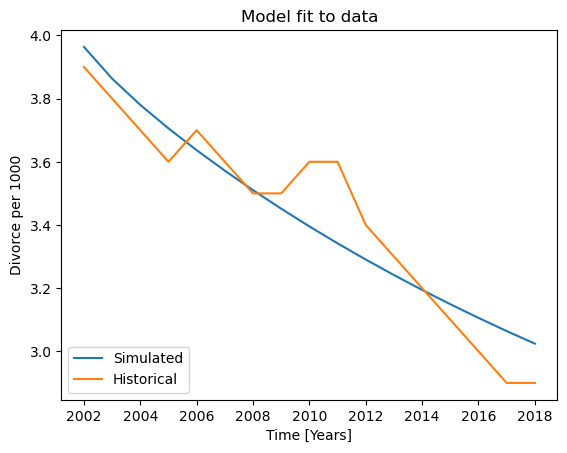

In [39]:
parameter1, parameter2, parameter3, parameter4, parameter5 = res.x
print(res)
result = model.run(params={'K':parameter1,
                           'W soc':parameter2,
                           'W eco':parameter3,
                           'Recovery rate':parameter4,
                           'Delay for societal':parameter5},
                   return_columns=['Divorce','Population','Scaled divorce'],
                   return_timestamps=list(data.index.values))

print(result)

plt.plot(result.index, result['Divorce']/result['Population'] *1000, label='Simulated')
plt.plot(data.index, data['United States'], label='Historical')
plt.xlabel('Time [Years]')
plt.ylabel('Divorce per 1000')
plt.title('Model fit to data')
plt.legend(loc='lower left')
plt.text(2,9000, '', color='r', fontsize=12)

message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.21282317328041087
       x: [ 2.993e+00  3.634e-01  1.134e-17  2.041e-03  4.660e-01]
     nit: 37
     jac: [ 3.732e-03  3.406e-03  3.203e-02 -8.908e-01 -1.537e-04]
    nfev: 242
    njev: 37